In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report,accuracy_score

In [136]:
data = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-6\House_price_prediction_data.csv")

In [137]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:

for i in data.columns:
    print(data[i].nunique(),data[i].isnull().sum())

1460 0
15 0
5 0
110 259
1073 0
2 0
2 1369
4 0
4 0
2 0
5 0
3 0
25 0
9 0
8 0
5 0
8 0
10 0
9 0
112 0
61 0
6 0
8 0
15 0
16 0
3 872
327 8
4 0
5 0
6 0
4 37
4 37
4 38
6 37
637 0
6 38
144 0
780 0
721 0
6 0
5 0
2 0
5 1
753 0
417 0
24 0
861 0
4 0
3 0
4 0
3 0
8 0
4 0
4 0
12 0
7 0
4 0
5 690
6 81
97 81
3 81
5 0
441 0
5 81
5 81
3 0
274 0
202 0
120 0
20 0
76 0
8 0
3 1453
4 1179
4 1406
21 0
12 0
5 0
9 0
6 0
663 0


In [139]:
data.shape

(1460, 81)

In [140]:
x = null_counts[null_counts > 0]
print(x)

BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
FireplaceQu     689
GarageType       81
GarageFinish     81
dtype: int64


In [141]:
null_counts = data.isnull().sum()
x = null_counts[null_counts > 800]
print(x)

print(x.index)

x_df = pd.DataFrame(x)


Alley          1369
MasVnrType      872
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [142]:
data.drop(columns=x_df.index,inplace=True)

In [143]:
data.shape

(1460, 76)

In [144]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [145]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [146]:
data.drop_duplicates(inplace=True)

In [147]:
data.shape

(1460, 76)

In [148]:
data[data.describe().columns].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [149]:
import numpy as np

corr_matrix = data[data.describe().columns].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Highly correlated columns:", to_drop)

data = data.drop(columns=to_drop)


Highly correlated columns: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


In [150]:
data.shape

(1460, 72)

In [151]:
for col in data.describe().columns:
    data[col] = data[col].fillna(data[col].mean())

In [152]:
for i in data.select_dtypes(include='object').columns:
    data[i] = data[i].fillna(data[i].mode())

In [155]:
null_counts = data.isnull().sum()
x = null_counts[null_counts > 800]
print(x)

print(x.index)

x_df = pd.DataFrame(x)


Series([], dtype: int64)
Index([], dtype='object')


In [156]:
columns_to_keep = []
for i in data.select_dtypes(include='object').columns:
    if (data[i].value_counts().max() > data[i].count() * 0.80):
        columns_to_keep.append(i)

In [157]:
columns_to_keep

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [158]:
data.drop(columns=columns_to_keep,inplace=True)
data.shape

(1460, 52)

In [160]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include='object').columns
categorical = data[categorical_columns]
encoded_data = data.copy()

for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_data[column] = label_encoder.fit_transform(data[column])

encoded_labels = encoded_data[categorical_columns]
encoded_labels

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,3,3,4,5,5,1,12,13,2,2,2,3,2,0,2,2,1,1
1,3,3,2,24,2,1,8,8,3,1,2,1,0,0,3,4,1,1
2,3,0,4,5,5,1,12,13,2,2,2,2,2,0,2,4,1,1
3,3,0,0,6,5,1,13,15,3,0,3,3,0,2,2,2,5,2
4,3,0,2,15,5,1,12,13,2,2,2,0,2,0,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,8,5,1,12,13,3,2,2,3,5,0,3,4,1,1
1456,3,3,4,14,2,1,9,10,3,1,2,3,0,4,3,4,1,2
1457,3,3,4,6,5,1,5,5,0,4,3,3,2,0,2,2,1,1
1458,3,3,4,12,2,3,8,8,3,1,3,2,2,2,2,5,1,2


In [161]:
final_data = data.drop(columns=categorical_columns).join(encoded_labels)

In [162]:
final_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2,2,2,3,2,0,2,2,1,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,3,1,2,1,0,0,3,4,1,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2,2,2,2,2,0,2,4,1,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,3,0,3,3,0,2,2,2,5,2
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2,2,2,0,2,0,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,3,2,2,3,5,0,3,4,1,1
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,3,1,2,3,0,4,3,4,1,2
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,4,3,3,2,0,2,2,1,1
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,3,1,3,2,2,2,2,5,1,2


In [164]:
final_data.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
dtype: int64

In [165]:
x = final_data.drop('SalePrice',axis=1)
y = final_data['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Linear Regression model

In [182]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [183]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LinearRegression

Linear = LinearRegression()
Linear.fit(x_train_scaled, y_train)
y_pred = Linear.predict(x_test_scaled)


In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lin_r2_sco = r2_score(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)
lin_mae = mean_absolute_error(y_test, y_pred)

In [197]:
print("r2_score : ",lin_r2_sco)
print("mse : ",lin_mse)
print("mae : ",lin_mae)
print("rmse : ",np.sqrt(lin_mae))

r2_score :  0.8242999519602665
mse :  1347676683.0832047
mae :  21659.427801872273
rmse :  147.17142318355243


<Axes: xlabel='SalePrice'>

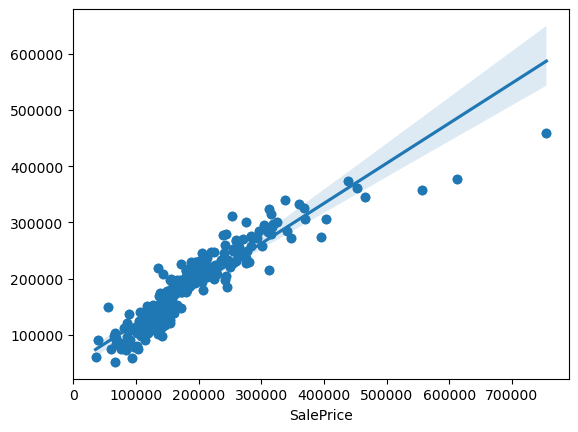

In [198]:
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

## Lasso 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='SalePrice'>

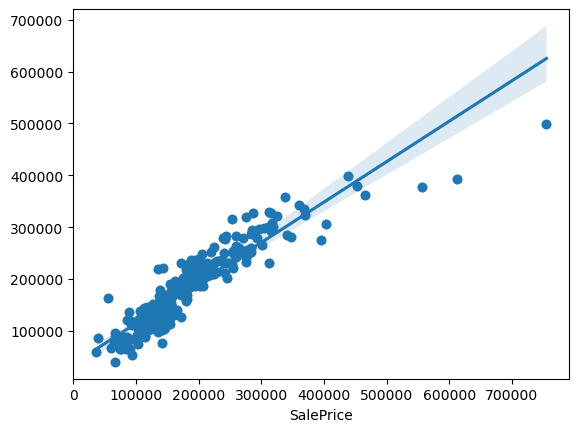

In [199]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

In [200]:
lasso_r2_sco = r2_score(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
print("lasso_r2_sco : ",lasso_r2_sco)
print("lasso_mse",lasso_mse)
print("lasso_mae",lasso_mae)

lasso_r2_sco :  0.8422963145611103
lasso_mse 1209638711.3919103
lasso_mae 21724.805118486438


## Ridge

<Axes: xlabel='SalePrice'>

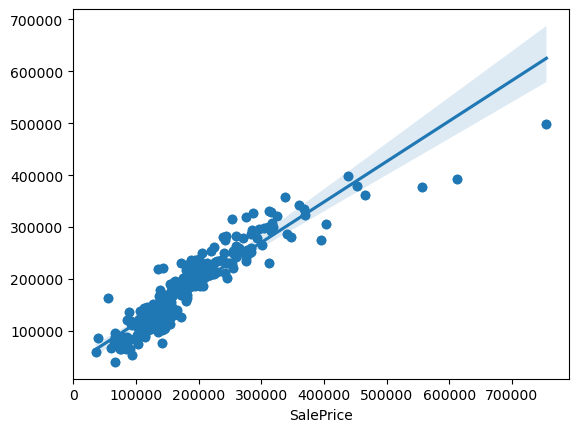

In [201]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

In [202]:
ridge_r2_sco = r2_score(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("ridge_r2_sco : ",ridge_r2_sco)
print("ridge_mse",ridge_mse)
print("ridge_mae",ridge_mae)

ridge_r2_sco :  0.8422800481339316
ridge_mse 1209763480.1945963
ridge_mae 21724.14402774222


## ElasticNet Regression

<Axes: xlabel='SalePrice'>

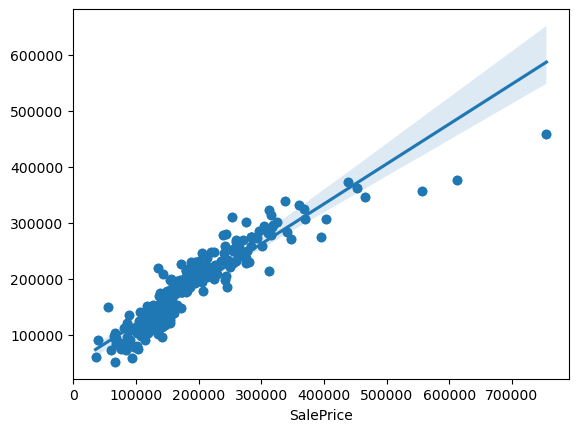

In [203]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
sns.regplot(x=y_test,y=y_pred)

In [204]:
elasticnet_r2_sco = r2_score(y_test, y_pred)
elasticnet_mse = mean_squared_error(y_test, y_pred)
elasticnet_mae = mean_absolute_error(y_test, y_pred)
print("elasticnet_r2_sco : ",elasticnet_r2_sco)
print("elasticnet_mse",elasticnet_mse)
print("elasticnet_mae",elasticnet_mae)

elasticnet_r2_sco :  0.8242999519602665
elasticnet_mse 1347676683.0832047
elasticnet_mae 21659.427801872273


## Comaparison of all model

In [209]:
import pandas as pd

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression'],
    'R² Score': [lin_r2_sco, lasso_r2_sco, ridge_r2_sco, elasticnet_r2_sco],
    'MSE': [lin_mse, lasso_mse, ridge_mse, elasticnet_mse],
    'MAE': [lin_mae, lasso_mae, ridge_mae, elasticnet_mae]
})

print(comparison)


SyntaxError: ':' expected after dictionary key (2225826043.py, line 7)